In [1]:
import sys

# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "/ai2es/")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cocpit
from ai2es import rain_gauge_classification_report as rain_gauge_classification_report


import seaborn as sns
import matplotlib.pyplot as plt

# plt_params = {
#     "axes.labelsize": "x-large",
#     "axes.titlesize": "x-large",
#     "xtick.labelsize": "x-large",
#     "ytick.labelsize": "x-large",
#     "legend.title_fontsize": 14,
# }
# plt.rcParams["font.family"] = "serif"
# plt.rcParams.update(plt_params)
sns.set_style("whitegrid")
%load_ext autoreload
%autoreload 2

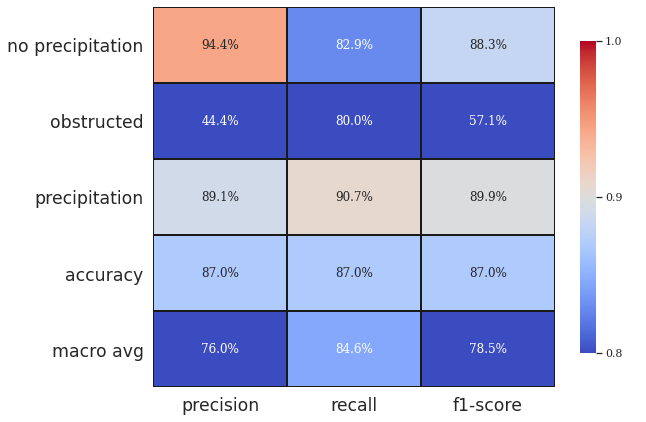

In [82]:
clf_report = pd.read_csv(
    "/ai2es/saved_accuracies/v0.0.0/clf_report_placeholder.csv",
    index_col=0,
).drop(columns=["model", "fold"])
save_name = "/ai2es/plots/weighted_classification_report_rain_gauge_2class.png"


cocpit.plotting_scripts.classification_report.classification_report_classes(
    clf_report, save_name=save_name, save_fig=False
)  

In [2]:
df = rain_gauge_classification_report.main(root_dir = '/ai2es/saved_accuracies/v0.0.0/')

In [3]:
df

,Labeling Strategy,Precision,Recall,F1-score,kfold,Model Architecture
0,2 class human,0.965821,0.965756,0.965738,0,resnet18
1,2 class human,0.969508,0.969463,0.969450,1,resnet18
2,2 class human,0.966728,0.966696,0.966683,2,resnet18
3,2 class human,0.967969,0.967829,0.967806,0,resnet34
4,2 class human,0.967401,0.967264,0.967240,1,resnet34
...,...,...,...,...,...,...
22,3 class joint rain gauge/human,0.906237,0.905605,0.905646,1,densenet169
23,3 class joint rain gauge/human,0.911053,0.909945,0.909828,2,densenet169
24,3 class joint rain gauge/human,0.905318,0.902639,0.902906,0,densenet201
25,3 class joint rain gauge/human,0.910862,0.909766,0.909996,1,densenet201


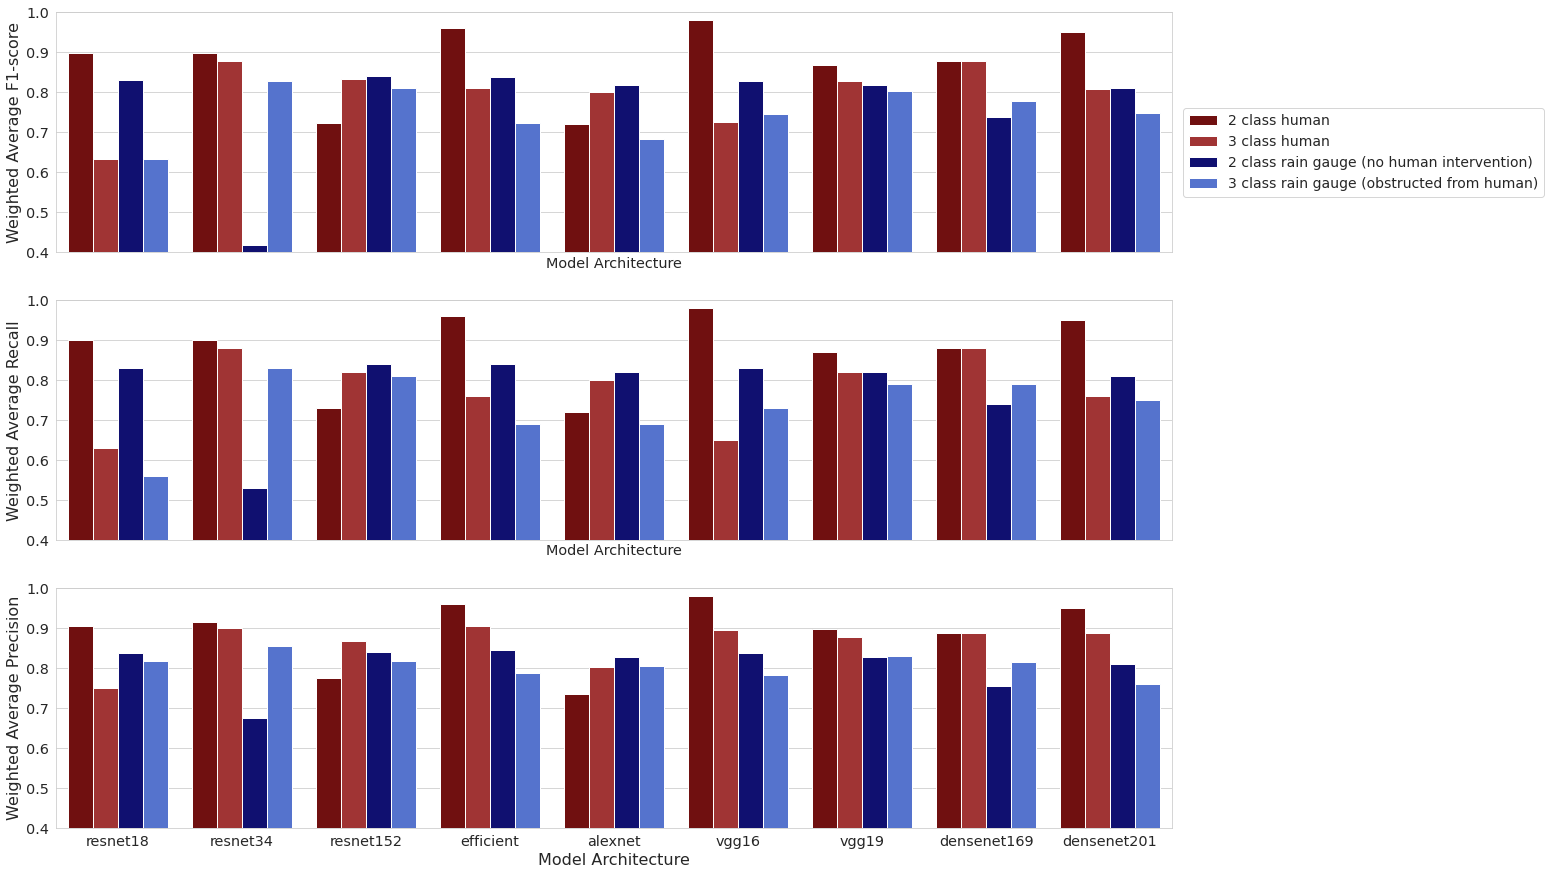

In [8]:
fig, axs = plt.subplots (3, 1, figsize=(20, 15), sharex='col')
y_vars = ['F1-score', 'Recall', 'Precision']
labels = ['Weighted Average F1-score', 'Weighted Average Recall', 'Weighted Average Precision']
for (ax, y_var, label) in zip(axs, y_vars, labels):
    g = sns.boxplot(x = "Model Architecture",      
                y = y_var,     
                hue = "Labeling Strategy",  
                data = df,   
                palette=['maroon', 'firebrick', 'navy', 'royalblue'],
                ax=ax
                )
    g.set(ylim=(0.4, 1.0))
    g.set_ylabel(label,fontsize=16)
    g.legend([],[], frameon=False)
g.set_xlabel('Model Architecture',fontsize=16)
plt.legend(bbox_to_anchor=(1.01, 3.0), loc='upper left', borderaxespad=0, fontsize=14)


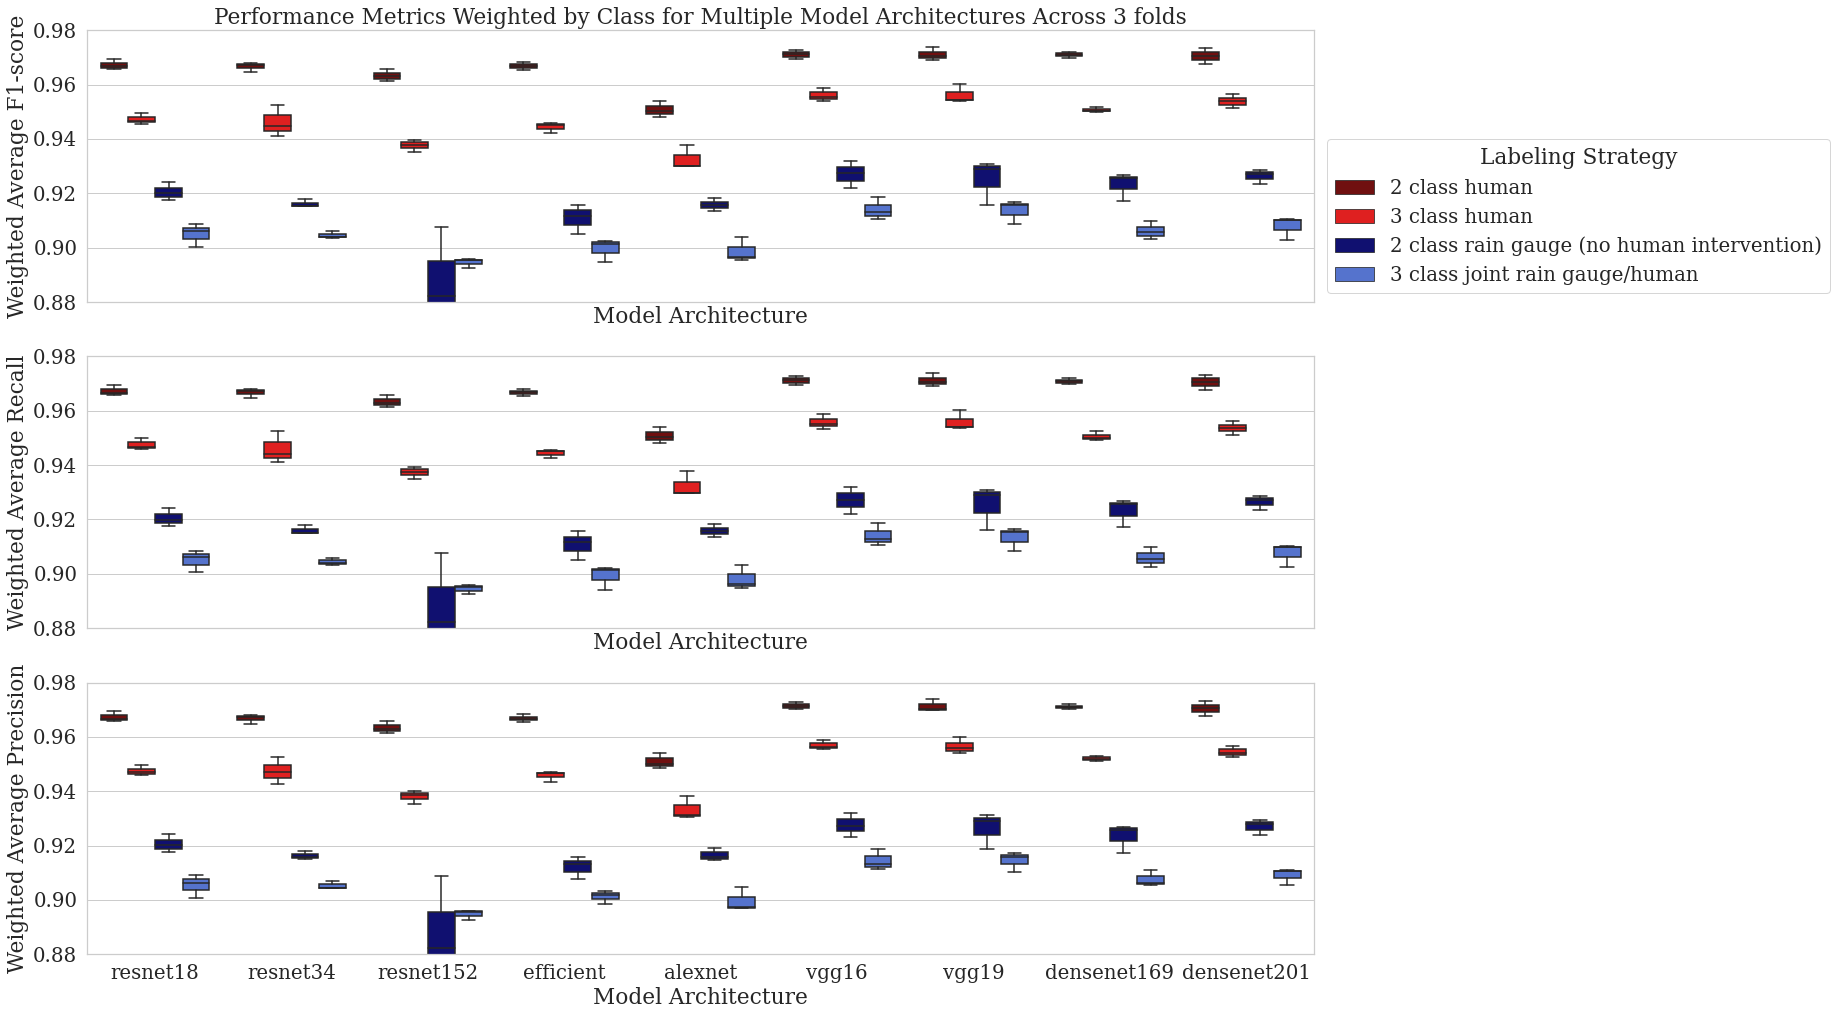

In [15]:
fig, axs = plt.subplots (3, 1, figsize=(22, 17), sharex='col')
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif'})

y_vars = ['F1-score', 'Recall', 'Precision']
labels = ['Weighted Average F1-score', 'Weighted Average Recall', 'Weighted Average Precision']
for (ax, y_var, label) in zip(axs, y_vars, labels):
    if ax == axs[0]:
        ax.set_title('Performance Metrics Weighted by Class for Multiple Model Architectures Across 3 folds')
    g = sns.boxplot(x = "Model Architecture",      
                y = y_var,     
                hue = "Labeling Strategy",  
                data = df,   
                palette=['maroon', 'red', 'navy', 'royalblue'],
                ax=ax
                )
    g.set(ylim=(0.88, .98))
    g.set_ylabel(label)
    g.legend([],[], frameon=False)
g.set_xlabel('Model Architecture')
plt.legend(bbox_to_anchor=(1.01, 3.0), loc='upper left', borderaxespad=0, title='Labeling Strategy')
fig.savefig('/ai2es/plots/classification_report_labeling_strategies.png', bbox_inches='tight', dpi=300)
